<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

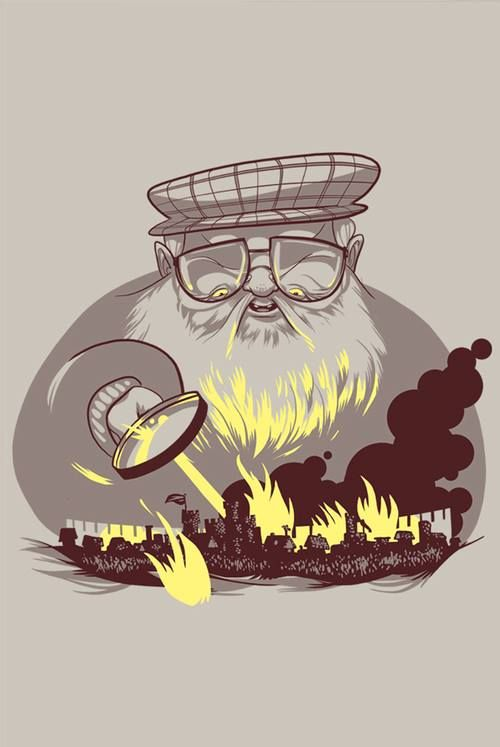

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 44.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 25.5MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [546]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [518]:
data_nan = data.isna().sum(axis=0).to_frame(name='Количество NaN')
data_nan

,Количество NaN
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [519]:
percentage_nan = []
for ind, _ in enumerate(list(data.columns)):
  percentage_nan.append(round(data[data.columns[ind]].isna().sum(axis=0)/len(data[data.columns[ind]]) * 100, 3))

data_nan['Процент NaN'] = percentage_nan
data_nan

,Количество NaN,Процент NaN
name,0,0.000
title,840,53.950
male,0,0.000
culture,1069,68.658
dateOfBirth,1278,82.081
mother,1539,98.844
father,1535,98.587
heir,1536,98.651
house,381,24.470
spouse,1357,87.155


Text(0.5, 1.0, 'Процент пропущенных значений в каждом столбце')

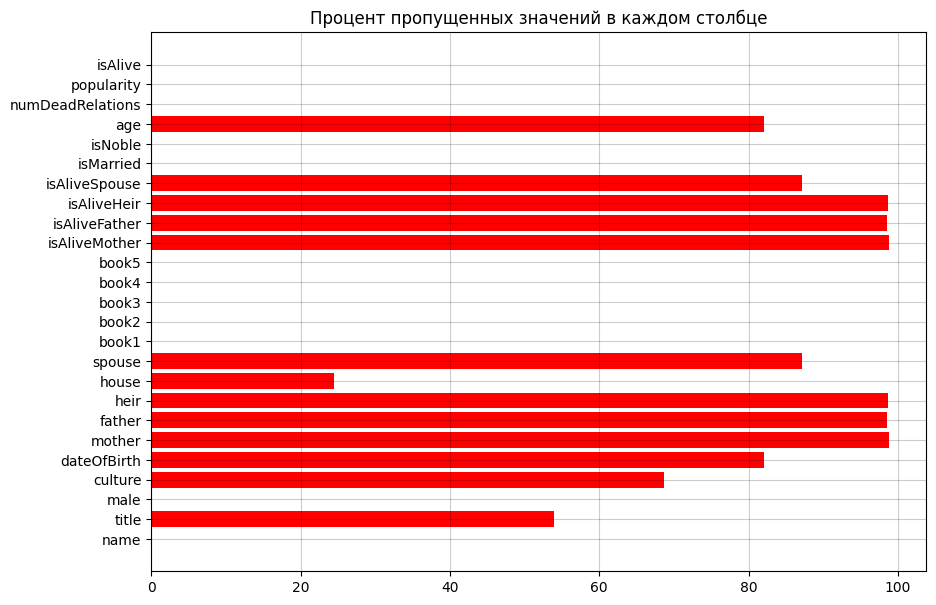

In [520]:
plt.figure(figsize=(10, 7))
plt.grid(color='black', alpha=0.2)
plt.barh(data_nan.index, data_nan['Процент NaN'], color='red')
plt.title('Процент пропущенных значений в каждом столбце')

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [521]:
#для того, чтобы принимать решение по поводу значений NaN, посмотрим корреляцию количественных признаков по отношению к целевой переменной
#для этого нужно удалить качественные признаки. очевидно, что имя персонажа, его родителей, наследника и супруги(а) не влияют на целевую переменную.
#поэтому их можно удалить. остальные целевые признаки пока поместим в отдельный датасет

data.drop(['name', 'spouse', 'heir', 'father', 'mother'], axis=1, inplace=True)

qual_features = pd.DataFrame()
for col in list(data.columns):
  if col in ['title', 'house', 'culture']:
    qual_features[col] = data[col]
    data.drop(col, axis=1, inplace=True)

qual_features

,title,culture,house
S.No,,,
1,NaN,NaN,NaN
2,Lord of the Crossing,Rivermen,House Frey
3,Ser,NaN,House Swyft
4,Queen,NaN,House Arryn
5,Greenstone,Dornish,House Santagar
...,...,...,...
1553,Archmaester,NaN,NaN
1554,NaN,NaN,NaN
1555,NaN,NaN,House Seaworth


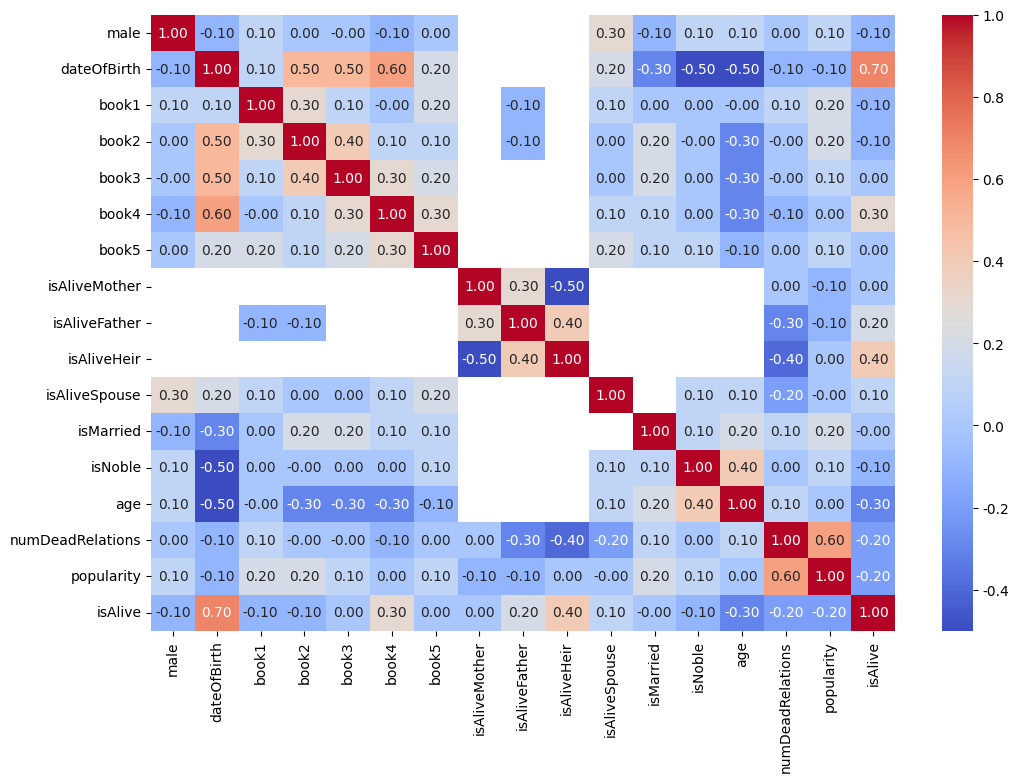

In [522]:
#посмотрим корреляцию количественных признаков
data_corr = data.corr().round(1)
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'format': '%.1f'})
plt.show()

In [523]:
#объединим обратно датасет с качественными признаками
data = pd.concat([data, qual_features], axis = 1)

In [ ]:
#data.dropna(subset=['dateOfBirth'], inplace=True)

In [524]:

N = 650
nan_indices = data[data['dateOfBirth'].isna()].index
indices_to_drop = nan_indices[:N]
data.drop(indices_to_drop, inplace=True)


In [525]:
'''
удалим колонки, где количество NaN больше 80 процентов за исключением колонок age и date_or_birth, так как
они имеют неплохую корреляцию с целевой переменной
'''
for col in list(data.columns):
  if data[col].isna().sum(axis=0)/len(data[col]) > 80 and col not in ['age', 'dateOfBirth']:
    data.drop(col, axis=1, inplace=True)

data

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,title,culture,house
S.No,,,,,,,,,,,,,,,,,,,,
2,1,208.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Lord of the Crossing,Rivermen,House Frey
4,0,82.0,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Queen,NaN,House Arryn
5,0,276.0,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Greenstone,Dornish,House Santagar
7,1,183.0,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0,Hand of the King,Valyrian,House Targaryen
23,0,289.0,0,0,0,1,0,NaN,NaN,NaN,NaN,0,0,16.0,0,0.033445,1,NaN,NaN,Brotherhood Without Banners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,NaN,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1,Archmaester,NaN,NaN
1554,0,NaN,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0,NaN,NaN,NaN
1555,1,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0,NaN,NaN,House Seaworth


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [526]:
isPopular = isPopular = list(map(lambda x: 0.5 if x == 0.5 else (0 if x < 0.5 else 1), data['popularity']))
data['isPopular'] = isPopular

boolDeadRelations = [1 if x > 0 else 0 for x in data['numDeadRelations']]
data['boolDeadRelations'] = boolDeadRelations

data.drop(['numDeadRelations', 'popularity'], axis=1, inplace=True)
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,title,culture,house,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
2,1,208.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,Lord of the Crossing,Rivermen,House Frey,1,1
4,0,82.0,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,Queen,NaN,House Arryn,0,0
5,0,276.0,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,1,Greenstone,Dornish,House Santagar,0,0
7,1,183.0,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,Hand of the King,Valyrian,House Targaryen,0,0
23,0,289.0,0,0,0,1,0,NaN,NaN,NaN,NaN,0,0,16.0,1,NaN,NaN,Brotherhood Without Banners,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,NaN,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,NaN,1,Archmaester,NaN,NaN,0,0
1554,0,NaN,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0
1555,1,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,House Seaworth,0,0


In [527]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

reverse_cult = {value: key for key, values in cult.items() for value in values}

def simplify_culture(culture):

  if pd.isna(culture):
        return culture

  culture_lower = culture.lower()
  return reverse_cult.get(culture_lower, culture)

data['culture'] = data['culture'].apply(simplify_culture)
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,title,culture,house,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
2,1,208.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,Lord of the Crossing,Rivermen,House Frey,1,1
4,0,82.0,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,Queen,NaN,House Arryn,0,0
5,0,276.0,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,1,Greenstone,Dornish,House Santagar,0,0
7,1,183.0,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,Hand of the King,Valyrian,House Targaryen,0,0
23,0,289.0,0,0,0,1,0,NaN,NaN,NaN,NaN,0,0,16.0,1,NaN,NaN,Brotherhood Without Banners,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,NaN,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,NaN,1,Archmaester,NaN,NaN,0,0
1554,0,NaN,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0
1555,1,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,House Seaworth,0,0


In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 2 to 1557
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1257 non-null   int64  
 1   dateOfBirth        279 non-null    float64
 2   book1              1257 non-null   int64  
 3   book2              1257 non-null   int64  
 4   book3              1257 non-null   int64  
 5   book4              1257 non-null   int64  
 6   book5              1257 non-null   int64  
 7   isAliveMother      5 non-null      float64
 8   isAliveFather      8 non-null      float64
 9   isAliveHeir        6 non-null      float64
 10  isAliveSpouse      190 non-null    float64
 11  isMarried          1257 non-null   int64  
 12  isNoble            1257 non-null   int64  
 13  age                279 non-null    float64
 14  isAlive            1257 non-null   int64  
 15  title              641 non-null    object 
 16  culture            388 non-nu

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [528]:
#удалим колонки с количественными признаками, которые имеют слишком большое количество NaN
#и имеющие при этом слабую корреляцию (за исключением isAliveHeir, но количество NaN слишком большое)
#плюс некоторые столбцы уже удалили выше
data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], axis=1, inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [529]:
#целевая переменная количественная
balance_data = data['isAlive'].value_counts(normalize=True) * 100
balance_data

,proportion
isAlive,
1,74.200662
0,25.799338


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [530]:
# Словарь для группировки титулов
title_groups = {
    "Nobility": [
        "Lord", "Lady", "King", "Queen", "Prince", "Princess", "Lord of the Crossing",
        "Lord of the Iron Islands", "Lord of Coldmoat", "Prince of Dragonstone",
        "LadyQueenDowager Queen", "Lord of the Tides", "Lord of Dragonstone",
        "King in the North", "Lord Paramount of the Mander", "Lord of Sunflower Hall",
        "Lord of the Marches", "Lord Reaper of Pyke", "Lord of the Red Dunes",
        "Lord of Greyshield", "Lord of the Snakewood", "Lord of Crows Nest",
        "Lord of the Deep Den", "Lord of Darry", "Lord of Oldcastle",
        "Lord of Southshield", "Lord of Flint's Finger", "Lord of the Tor",
        "Lord of Iron Holt", "Lord of Honeyholt", "Lady of Darry", "Prince of Winterfell",
        "Lord of Kingsgrave", "Lord of Starfall", "Lord of Hellholt", "Lord of Harrenhal"
    ],
    "Religious": [
        "Septa", "Septon", "Red Priest", "Grand Maester", "Blue Grace", "Wisdom"
    ],
    "Military": [
        "Ser", "Knight", "Bloodrider", "Commander", "First Ranger", "Master-at-Arms",
        "Captain", "Captain of the guard", "Commander of the Second Sons"
    ],
    "Administrative": [
        "Hand of the King", "Archmaester", "Maester", "Castellan", "Seneschal",
        "Steward", "Lord Steward of the Iron Islands", "Master of coin",
        "Master of Coin", "Master of Deepwood Motte", "Protector of the Realm",
        "Master of ships", "Mistress of whisperers"
    ],
    "Other": [
        "Goodman", "Goodwife", "Good Master", "Goodwife", "Tradesman-Captain",
        "Magister of Pentos", "Chief Undergaoler", "Undergaoler", "Oarmaster",
        "First Sword of Braavos", "King-Beyond-the-Wall", "King of the Andals",
        "King of the Iron Islands", "King of Astapor", "Light of the West",
        "Protector of the Realm", "QueenBlack Bride", "Lady Marya", "LadyQueen",
        "PrincessQueen", "PrincessSepta", "Khal", "Khalakka", "KhalKo (formerly)",
        "Red hand", "Wind Witch", "Wraith", "Winterfell", "Eyrie", "Casterly Rock",
        "Hornwood", "Last Hearth", "Seagard", "Uplands", "Coldmoat", "Ashford",
        "Broad Arch", "Brightwater", "Blackcrown", "Golden Tooth", "Whitewalls",
        "Hornvale", "Claw Isle", "Ironoaks", "Bitterbridge", "Strongsong",
        "Goldengrove", "Harridan Hill", "Godsgrace", "Duskendale", "Sharp Point",
        "Riverrun", "Grassy Vale", "Longbow Hall", "Hayford", "Dyre Den", "Skyreach",
        "Feastfires", "Stonehelm", "Crag", "Gulltown", "Sweetsister", "Starpike",
        "Sweetport Sound", "Felwood", "Goldgrass", "Redfort", "Tower of Glimmering",
        "Big BucketThe Wull", "Blackmont", "Widow's Watch", "Castle Lychester",
        "Heart's Home", "Harrenhal", "Volmark", "Pebbleton", "Greenshield",
        "Shatterstone", "Atranta", "Ghost Hill", "Yronwood", "Banefort", "Hightower",
        "Sandstone", "Wyndhall", "Runestone", "Rills", "Longsister", "Cobblecat",
        "Coldwater Burn", "Lordsport", "Fair Isle", "Rook's Rest", "Crakehall",
        "Deepwood Motte", "Kayce", "Acorn Hall", "Ten Towers", "Three Towers",
        "The LiddleLord Liddle", "Salt Shore", "Sealskin Point", "Three Sisters",
        "Grey Glen", "Dragonstone", "Maidenpool", "Karhold", "Nightsong",
        "Eastwatch-by-the-Sea", "Foamdrinker", "Red Flower Vale", "Rain House",
        "Highgarden"
    ]
}

In [531]:
# Создаем обратный словарь для замены
reverse_titles = {title: group for group, titles in title_groups.items() for title in titles}

# Заменяем значения в столбце 'title' на группы
data['title_group'] = data['title'].map(reverse_titles)

# Заменяем отсутствующие значения на "Unknown"
data['title_group'] = data['title_group'].fillna('Unknown')

In [532]:
data.drop('title', axis=1, inplace=True)

In [533]:
#переводим качественные признаки title, house, culture в количественные

for col in ['culture', 'title_group', 'house']:
  freq = data[col].value_counts(normalize=True)
  data[f'{col}_encoded'] = data[col].map(freq)

data.drop(['culture', 'title_group', 'house'], axis=1, inplace=True)
data.head(10)

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,culture_encoded,title_group_encoded,house_encoded
S.No,,,,,,,,,,,,,,,,
2,1,208.0,1,1,1,1,1,1,1,97.0,1,1,1,0.033333,0.085998,0.109694
4,0,82.0,0,0,0,0,0,1,1,23.0,0,0,0,NaN,0.085998,0.007653
5,0,276.0,0,0,0,1,0,1,1,29.0,1,0,0,0.074074,0.459757,0.002551
7,1,183.0,0,0,0,0,0,1,1,26.0,0,0,0,0.088889,0.033076,0.040816
23,0,289.0,0,0,0,1,0,0,0,16.0,1,0,0,NaN,0.459757,0.005102
34,0,280.0,0,0,0,1,1,0,0,25.0,1,0,0,NaN,0.459757,0.002551
42,1,240.0,0,0,1,0,0,0,0,59.0,0,0,0,NaN,0.459757,0.062500
49,1,286.0,0,1,1,1,1,0,0,19.0,1,0,0,0.111111,0.459757,0.003827
50,1,278.0,1,1,1,0,1,0,1,27.0,1,0,0,0.011111,0.459757,0.001276


In [534]:
data['culture_encoded'] = data['culture_encoded'].fillna(data['culture_encoded'].median())
data['title_group_encoded'] = data['title_group_encoded'].fillna(data['title_group_encoded'].median())
data['house_encoded'] = data['house_encoded'].fillna(data['house_encoded'].median())
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,culture_encoded,title_group_encoded,house_encoded
S.No,,,,,,,,,,,,,,,,
2,1,208.0,1,1,1,1,1,1,1,97.0,1,1,1,0.033333,0.085998,0.109694
4,0,82.0,0,0,0,0,0,1,1,23.0,0,0,0,0.074074,0.085998,0.007653
5,0,276.0,0,0,0,1,0,1,1,29.0,1,0,0,0.074074,0.459757,0.002551
7,1,183.0,0,0,0,0,0,1,1,26.0,0,0,0,0.088889,0.033076,0.040816
23,0,289.0,0,0,0,1,0,0,0,16.0,1,0,0,0.074074,0.459757,0.005102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,NaN,1,0,1,1,0,0,1,NaN,1,0,0,0.074074,0.033076,0.005102
1554,0,NaN,1,1,0,0,0,0,0,NaN,0,0,0,0.074074,0.459757,0.005102
1555,1,NaN,0,1,1,1,1,0,0,NaN,0,0,0,0.074074,0.459757,0.008929


In [535]:
#возраст и дата рождения заполним средним и медианой соответственно
data['age'] = data['age'].fillna(data['age'].median())
data['dateOfBirth'] = data['dateOfBirth'].fillna(data['dateOfBirth'].median())

In [536]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 2 to 1557
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   male                 907 non-null    int64  
 1   dateOfBirth          907 non-null    float64
 2   book1                907 non-null    int64  
 3   book2                907 non-null    int64  
 4   book3                907 non-null    int64  
 5   book4                907 non-null    int64  
 6   book5                907 non-null    int64  
 7   isMarried            907 non-null    int64  
 8   isNoble              907 non-null    int64  
 9   age                  907 non-null    float64
 10  isAlive              907 non-null    int64  
 11  isPopular            907 non-null    int64  
 12  boolDeadRelations    907 non-null    int64  
 13  culture_encoded      907 non-null    float64
 14  title_group_encoded  907 non-null    float64
 15  house_encoded        907 non-null    float64

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

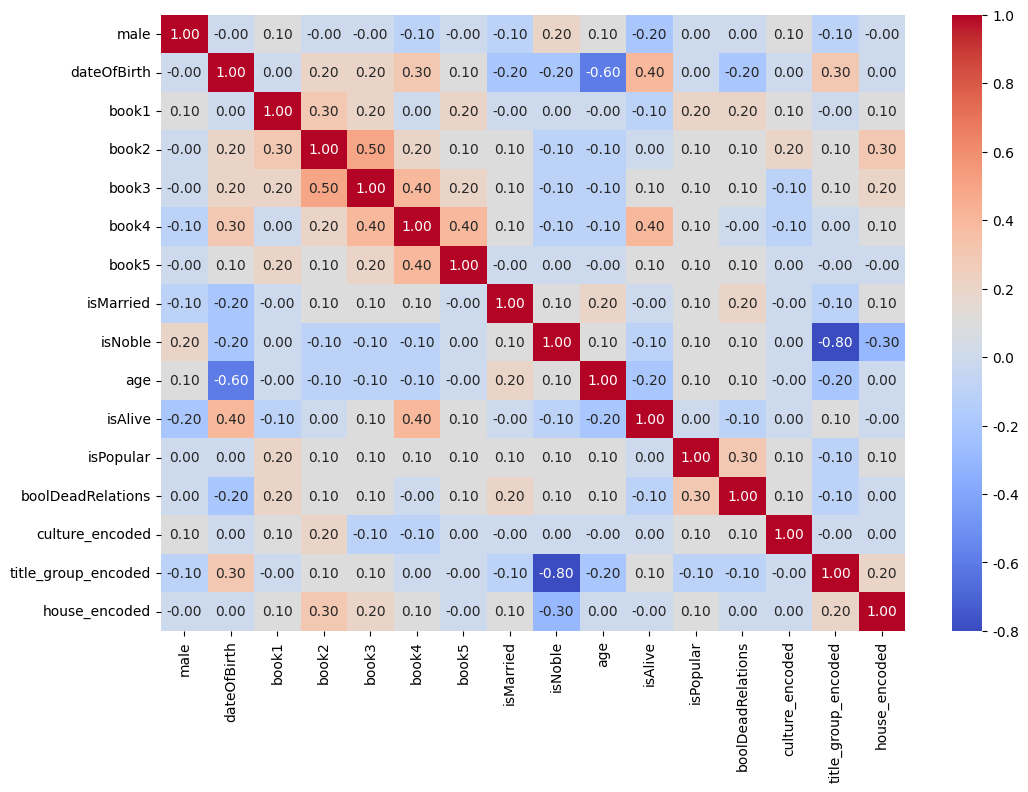

In [537]:
#посмотрим еще раз на корреляцию
data_corr = data.corr().round(1)
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'format': '%.1f'})
plt.show()

In [538]:
for col in list(data.columns):
  if col not in ['dateOfBirth', 'book4', 'book5', 'book3', 'male', 'title_group_encoded', 'isNoble', 'boolDeadRelations', 'isAlive']:
    data.drop(col, axis=1, inplace=True)
data.head(10)

,male,dateOfBirth,book3,book4,book5,isNoble,isAlive,boolDeadRelations,title_group_encoded
S.No,,,,,,,,,
2,1,208.0,1,1,1,1,1,1,0.085998
4,0,82.0,0,0,0,1,0,0,0.085998
5,0,276.0,0,1,0,1,1,0,0.459757
7,1,183.0,0,0,0,1,0,0,0.033076
23,0,289.0,0,1,0,0,1,0,0.459757
34,0,280.0,0,1,1,0,1,0,0.459757
42,1,240.0,1,0,0,0,0,0,0.459757
49,1,286.0,1,1,1,0,1,0,0.459757
50,1,278.0,1,0,1,1,1,0,0.459757


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [539]:
X = data.drop('isAlive', axis=1).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [540]:
from sklearn.model_selection import train_test_split

In [ ]:
'''
# Масштабирование данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
'''

In [541]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [542]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [569]:
# Шаг 1. создание модели
model = RandomForestClassifier(n_estimators=500)

# Шаг 2. обучение модели
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [570]:
from sklearn.model_selection import cross_val_score
# Выполняем кросс-валидацию на тренировочных данных
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Выводим среднюю точность и стандартное отклонение
print(f"Cross-Validation Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")

Cross-Validation Accuracy: 0.7600 (±0.0228)


In [571]:
from sklearn.metrics import accuracy_score
# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7747


In [572]:
test_data = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
test_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [573]:
#проделаем все те же манипуляции с тестовым датасетом, что и с трейновым
test_data.drop(['name', 'spouse', 'heir', 'father', 'mother'], axis=1, inplace=True)

for col in list(test_data.columns):
  if test_data[col].isna().sum(axis=0)/len(test_data[col]) > 80 and col not in ['age', 'dateOfBirth']:
    test_data.drop(col, axis=1, inplace=True)

isPopular = isPopular = list(map(lambda x: 0.5 if x == 0.5 else (0 if x < 0.5 else 1), test_data['popularity']))
test_data['isPopular'] = isPopular

boolDeadRelations = [1 if x > 0 else 0 for x in test_data['numDeadRelations']]
test_data['boolDeadRelations'] = boolDeadRelations

test_data.drop(['numDeadRelations', 'popularity'], axis=1, inplace=True)

cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

reverse_cult = {value: key for key, values in cult.items() for value in values}

def simplify_culture(culture):

  if pd.isna(culture):
        return culture

  culture_lower = culture.lower()
  return reverse_cult.get(culture_lower, culture)

test_data['culture'] = test_data['culture'].apply(simplify_culture)

test_data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], axis=1, inplace = True)

# Создаем обратный словарь для замены
reverse_titles = {title: group for group, titles in title_groups.items() for title in titles}

# Заменяем значения в столбце 'title' на группы
test_data['title_group'] = test_data['title'].map(reverse_titles)

# Заменяем отсутствующие значения на "Unknown"
test_data['title_group'] = test_data['title_group'].fillna('Unknown')
test_data.drop('title', axis=1, inplace=True)


for col in ['culture', 'title_group', 'house']:
  freq = test_data[col].value_counts(normalize=True)
  test_data[f'{col}_encoded'] = test_data[col].map(freq)

test_data.drop(['culture', 'title_group', 'house'], axis=1, inplace=True)

test_data['culture_encoded'] = test_data['culture_encoded'].fillna(test_data['culture_encoded'].mean())
test_data['title_group_encoded'] = test_data['title_group_encoded'].fillna(test_data['title_group_encoded'].mean())
test_data['house_encoded'] = test_data['house_encoded'].fillna(test_data['house_encoded'].mean())



test_data['age'] = test_data['age'].fillna(test_data['age'].mean())
test_data['dateOfBirth'] = test_data['dateOfBirth'].fillna(test_data['dateOfBirth'].median())

for col in list(test_data.columns):
  if col not in ['dateOfBirth', 'book4', 'book5', 'book3', 'male', 'title_group_encoded', 'isNoble', 'boolDeadRelations']:
    test_data.drop(col, axis=1, inplace=True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   male                 389 non-null    int64  
 1   dateOfBirth          389 non-null    float64
 2   book3                389 non-null    int64  
 3   book4                389 non-null    int64  
 4   book5                389 non-null    int64  
 5   isNoble              389 non-null    int64  
 6   boolDeadRelations    389 non-null    int64  
 7   title_group_encoded  389 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 27.4 KB


In [ ]:
#test_data = scaler.transform(test_data)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [574]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных
pred = model.predict(test_data)
pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [575]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.75MB/s]


In [576]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [577]:
submission['isAlive'] = pred

In [578]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [580]:
submission.to_csv("/content/new_submission.csv", index=False)